Given a sequence of {F|L|R}, each of which is "move forward one step", "turn left, then move forward one step", "turn right, then move forward one step":
1. which tours are closed?
2. what is the area enclosed by the tour?

In [1]:
import collections
import enum
import random
import os

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
class Direction(enum.Enum):
    UP = 1
    RIGHT = 2
    DOWN = 3
    LEFT = 4
    
turn_lefts = {Direction.UP: Direction.LEFT, Direction.LEFT: Direction.DOWN,
              Direction.DOWN: Direction.RIGHT, Direction.RIGHT: Direction.UP}

turn_rights = {Direction.UP: Direction.RIGHT, Direction.RIGHT: Direction.DOWN,
               Direction.DOWN: Direction.LEFT, Direction.LEFT: Direction.UP}

def turn_left(d):
    return turn_lefts[d]

def turn_right(d):
    return turn_rights[d]


In [3]:
Step = collections.namedtuple('Step', ['x', 'y', 'dir'])
Mistake = collections.namedtuple('Mistake', ['i', 'step'])

In [4]:
def advance(step, d):
    if d == Direction.UP:
        return Step(step.x, step.y+1, d)
    elif d == Direction.DOWN:
        return Step(step.x, step.y-1, d)
    elif d == Direction.LEFT:
        return Step(step.x-1, step.y, d)
    elif d == Direction.RIGHT:
        return Step(step.x+1, step.y, d)

In [5]:
def step(s, current):
    if s == 'F':
        return advance(current, current.dir)
    elif s == 'L':
        return advance(current, turn_left(current.dir))
    elif s == 'R':
        return advance(current, turn_right(current.dir))
    else:
        raise ValueError

In [6]:
def trace_tour(tour, startx=0, starty=0, startdir=Direction.RIGHT):
    current = Step(startx, starty, startdir)
    trace = [current]
    for s in tour:
        current = step(s, current)
        trace += [current]
    return trace    

In [6]:
# def trace_tour(tour, startx=0, starty=0, startdir=Direction.RIGHT):
#     current = Step(startx, starty, startdir)
#     trace = [current]
#     for s in tour:
#         if s == 'F':
#             current = advance(current, current.dir)
#         elif s == 'L':
#             current = advance(current, turn_left(current.dir))
#         elif s == 'R':
#             current = advance(current, turn_right(current.dir))
#         trace += [current]
#     return trace    

In [7]:
k = Step(1, 2, 3)

In [8]:
k

Step(x=1, y=2, dir=3)

In [9]:
Step

__main__.Step

In [10]:
d = Direction.UP
d

<Direction.UP: 1>

In [11]:
turn_right(d)

<Direction.RIGHT: 2>

In [12]:
turn_rights

{<Direction.RIGHT: 2>: <Direction.DOWN: 3>,
 <Direction.UP: 1>: <Direction.RIGHT: 2>,
 <Direction.LEFT: 4>: <Direction.UP: 1>,
 <Direction.DOWN: 3>: <Direction.LEFT: 4>}

In [13]:
trace_tour('FLRL')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=1, dir=<Direction.UP: 1>),
 Step(x=2, y=1, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=2, dir=<Direction.UP: 1>)]

In [14]:
trace_tour('FFLRLLFLRL')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=1, dir=<Direction.UP: 1>),
 Step(x=3, y=1, dir=<Direction.RIGHT: 2>),
 Step(x=3, y=2, dir=<Direction.UP: 1>),
 Step(x=2, y=2, dir=<Direction.LEFT: 4>),
 Step(x=1, y=2, dir=<Direction.LEFT: 4>),
 Step(x=1, y=1, dir=<Direction.DOWN: 3>),
 Step(x=0, y=1, dir=<Direction.LEFT: 4>),
 Step(x=0, y=0, dir=<Direction.DOWN: 3>)]

In [15]:
trace_tour('FLLFFLFFFLFFLFLLRRFR')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=1, dir=<Direction.UP: 1>),
 Step(x=0, y=1, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=1, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=1, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=0, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=-1, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=-2, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=-3, dir=<Direction.DOWN: 3>),
 Step(x=-1, y=-3, dir=<Direction.RIGHT: 2>),
 Step(x=0, y=-3, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=-3, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=-2, dir=<Direction.UP: 1>),
 Step(x=1, y=-1, dir=<Direction.UP: 1>),
 Step(x=0, y=-1, dir=<Direction.LEFT: 4>),
 Step(x=0, y=-2, dir=<Direction.DOWN: 3>),
 Step(x=-1, y=-2, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=-1, dir=<Direction.UP: 1>),
 Step(x=-1, y=0, dir=<Direction.UP: 1>),
 Step(x=0, y=0, dir=<Direction.RIGHT: 2>)]

In [16]:
trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLL')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=2, y=-1, dir=<Direction.DOWN: 3>),
 Step(x=3, y=-1, dir=<Direction.RIGHT: 2>),
 Step(x=3, y=0, dir=<Direction.UP: 1>),
 Step(x=3, y=1, dir=<Direction.UP: 1>),
 Step(x=4, y=1, dir=<Direction.RIGHT: 2>),
 Step(x=4, y=2, dir=<Direction.UP: 1>),
 Step(x=3, y=2, dir=<Direction.LEFT: 4>),
 Step(x=2, y=2, dir=<Direction.LEFT: 4>),
 Step(x=1, y=2, dir=<Direction.LEFT: 4>),
 Step(x=0, y=2, dir=<Direction.LEFT: 4>),
 Step(x=0, y=3, dir=<Direction.UP: 1>),
 Step(x=0, y=4, dir=<Direction.UP: 1>),
 Step(x=-1, y=4, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=3, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=3, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=2, dir=<Direction.DOWN: 3>),
 Step(x=-1, y=2, dir=<Direction.RIGHT: 2>),
 Step(x=-1, y=1, dir=<Direction.DOWN: 3>),
 Step(x=-2, y=1, dir=<Direction.LEFT: 4>),
 Step(x=-2, y=0, dir=<Direction.DOWN: 3>),
 Step(x=-1, y=0, dir=<Direct

In [17]:
def positions(trace):
    return [(s.x, s.y) for s in trace]

In [18]:
positions(trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLL'))

[(0, 0),
 (1, 0),
 (2, 0),
 (2, -1),
 (3, -1),
 (3, 0),
 (3, 1),
 (4, 1),
 (4, 2),
 (3, 2),
 (2, 2),
 (1, 2),
 (0, 2),
 (0, 3),
 (0, 4),
 (-1, 4),
 (-1, 3),
 (-2, 3),
 (-2, 2),
 (-1, 2),
 (-1, 1),
 (-2, 1),
 (-2, 0),
 (-1, 0),
 (-1, -1),
 (0, -1),
 (0, 0)]

In [19]:
def valid(trace):
    return (trace[-1].x == 0 
            and trace[-1].y == 0 
            and len(set(positions(trace))) + 1 == len(trace))

In [20]:
valid(trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLL'))

True

In [21]:
valid(trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLLFF'))

False

In [22]:
valid(trace_tour('FFLLLFRR'))

False

In [23]:
valid(trace_tour('F'))

False

In [24]:
valid(trace_tour('LLLL'))

True

In [25]:
def chunks(items, n=2):
    return [items[i:i+n] for i in range(len(items) - n + 1)]

In [26]:
import string
chunks(string.ascii_lowercase, 7)

['abcdefg',
 'bcdefgh',
 'cdefghi',
 'defghij',
 'efghijk',
 'fghijkl',
 'ghijklm',
 'hijklmn',
 'ijklmno',
 'jklmnop',
 'klmnopq',
 'lmnopqr',
 'mnopqrs',
 'nopqrst',
 'opqrstu',
 'pqrstuv',
 'qrstuvw',
 'rstuvwx',
 'stuvwxy',
 'tuvwxyz']

Using the [Shoelace formula](https://en.wikipedia.org/wiki/Shoelace_formula)

In [27]:
def shoelace(trace):
    return abs(sum(s.x * t.y - t.x * s.y for s, t in chunks(trace, 2))) // 2

In [28]:
shoelace(trace_tour('FFLRLLFLRL'))

4

In [29]:
shoelace(trace_tour('FLLFFLFFFLFFLFLLRRFR'))

9

In [30]:
shoelace(trace_tour('FFRLLFRLLFFFRFLLRLLRRLLRLL'))

15

In [31]:
def valid_prefix(tour):
    current = Step(0, 0, Direction.RIGHT)
    prefix = []
    posns = []
    for s in tour:
        current = step(s, current)
        prefix += [s]
        if (current.x, current.y) in posns:
            return ''
        elif current.x == 0 and current.y == 0: 
            return ''.join(prefix)
        posns += [(current.x, current.y)]
    if current.x == 0 and current.y == 0:
        return ''.join(prefix)
    else:
        return ''

In [32]:
def mistake_positions(trace, debug=False):
    mistakes = []
    current = trace[0]
    posns = [(0, 0)]
    for i, current in enumerate(trace[1:]):
        if (current.x, current.y) in posns:
            if debug: print(i, current)
            mistakes += [Mistake(i+1, current)]
        posns += [(current.x, current.y)]
    if (current.x, current.y) == (0, 0):
        return mistakes[:-1]
    else:
        return mistakes + [Mistake(len(trace)+1, current)]

In [33]:
def returns_to_origin(mistake_positions):
    return [i for i, m in mistake_positions
           if (m.x, m.y) == (0, 0)]

In [34]:
sample_tours = ['FFLRLLFLRL', 'FLLFFLFFFLFFLFLLRRFR', 'FFRLLFRLLFFFRFLLRLLRRLLRLL']

In [35]:
valid_prefix(sample_tours[0])

'FFLRLLFLRL'

In [36]:
all(valid_prefix(t) == t for t in sample_tours)

True

In [37]:
valid_prefix(sample_tours[0] + 'FLLLL') == sample_tours[0]

True

In [38]:
mistake_positions(trace_tour(sample_tours[0] + 'F'))

[Mistake(i=10, step=Step(x=0, y=0, dir=<Direction.DOWN: 3>)),
 Mistake(i=13, step=Step(x=0, y=-1, dir=<Direction.DOWN: 3>))]

In [39]:
mistake_positions(trace_tour(sample_tours[0] + 'FLLLL'))

[Mistake(i=10, step=Step(x=0, y=0, dir=<Direction.DOWN: 3>)),
 Mistake(i=13, step=Step(x=1, y=0, dir=<Direction.UP: 1>)),
 Mistake(i=14, step=Step(x=0, y=0, dir=<Direction.LEFT: 4>)),
 Mistake(i=15, step=Step(x=0, y=-1, dir=<Direction.DOWN: 3>)),
 Mistake(i=17, step=Step(x=0, y=-1, dir=<Direction.DOWN: 3>))]

In [40]:
(sample_tours[0] + 'FLLLL')[:10]

'FFLRLLFLRL'

In [41]:
def random_walk(steps=1000):
    return ''.join(random.choice('FFLR') for _ in range(steps))

In [42]:
valid_prefix(random_walk(1000))

''

In [45]:
valid_prefix(random_walk(1000))

'FFRRFR'

In [46]:
walks = []
while len(walks) < 10:
    w = valid_prefix(random_walk())
    if len(w) > 30: walks += [w]

In [47]:
walks

['RLFFLRFFFFRRLFFFRFFFFRFFLFFFRFRF',
 'FFFFFLLFFRRLFFFFLLFFRLRFFLFFLRLL',
 'LRLRLFFFFLLRLRLRFLFFFRLFLFFFLRLL',
 'FLFFFFLFRLFFFFRLRFLLFFFFFFLRFLFLFLRFRFFRFFFFLRFFFLFRLRFLLFFFFRLFLFFR',
 'LLFRLRFFLLRFRFLFFFLRLFFLFRFFFLFFRFFLFFFFLLFFFRFRFFLFRF',
 'FLLFLFFFRLFFLLRFFFFLRFLFFLFFFFLRRF',
 'FFLFRLLFFRFFFLRLFRLFLFFRLFFFLFFFRFRLRLFFLRRFFLLRLRFLFFLFFRFLFLLRRFFFRL',
 'RFFFFFLLRLFFFRLFLRFLLFRFFFFFFFLLFFFFRLLR',
 'LLFFFRLLFFFRFLLFRFFLLRFFLRLFLRRFLL',
 'FLLRFLRFFRRFLFFRRLFFFFFFRFFRFFRL']

In [48]:
trace_tour('FLLL')

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=1, dir=<Direction.UP: 1>),
 Step(x=0, y=1, dir=<Direction.LEFT: 4>),
 Step(x=0, y=0, dir=<Direction.DOWN: 3>)]

(-1, 3)

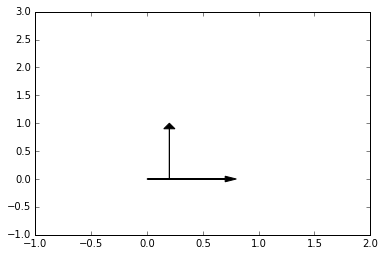

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.axis('on')
plt.arrow(0, 0, 0.8, 0, head_width=0.1, head_length=0.1, fc='k', ec='k', length_includes_head=True)
plt.arrow(0.2, 0, 0, 1, head_width=0.1, head_length=0.1, fc='k', ec='k', length_includes_head=True)
plt.xlim([-1, 2])
plt.ylim([-1, 3])

In [50]:
def bounds(trace):
    return (max(s.x for s in trace),
            max(s.y for s in trace),
            min(s.x for s in trace),
            min(s.y for s in trace))

In [51]:
bounds(trace_tour('RFRFFLRFLFFRRFFRRRRLLLRRRRRRFRLFRFFRFFRRFRLRRFLLFRLLFRFLFLFRFRLLFRLFRFLRRLLFRRRFRRRRLLFLFRFRRFFRRLLLRLRRFRLRRFFRRFLFRRLLRRFFRFRRRRRFLLLLLRRFFFLLFFFRRLFLFFLRRRFRFLLFFRRLLRFLLRRF'))

(0, 2, -13, -13)

In [52]:
plot_wh = {Direction.UP: (0, 1), Direction.LEFT: (-1, 0),
           Direction.DOWN: (0, -1), Direction.RIGHT: (1, 0)}

In [53]:
def plot_trace(trace, colour='k', highlight_start=True,
               xybounds=None, fig=None, subplot_details=None, filename=None):
    plt.axis('on')
    plt.axes().set_aspect('equal')
        
    if highlight_start:
        plt.axes().add_patch(plt.Circle((trace[0].x, trace[0].y), 0.2, color=colour))
        
    for s, t in chunks(trace, 2):
        w, h = plot_wh[t.dir]
        plt.arrow(s.x, s.y, w, h, head_width=0.1, head_length=0.1, fc=colour, ec=colour, length_includes_head=True)
    xh, yh, xl, yl = bounds(trace)
    if xybounds is not None:    
        bxh, byh, bxl, byl = xybounds
        plt.xlim([min(xl, bxl)-1, max(xh, bxh)+1])
        plt.ylim([min(yl, byl)-1, max(yh, byh)+1])
    else:
        plt.xlim([xl-1, xh+1])
        plt.ylim([yl-1, yh+1])
    if filename:
        plt.savefig(filename)

In [53]:
# def plot_trace(trace, colour='k', xybounds=None, fig=None, subplot_details=None):
#     plt.ioff()
#     if fig is None:
#         fig = plt.figure()
#         ax = fig.gca()
#     if subplot_details is not None:
#         ax = fig.add_subplot(*subplot_details)
#     plt.axis('on')
# #     plt.axes().set_aspect('equal')
#     ax.set_aspect('equal')
#     for s, t in chunks(trace, 2):
#         w, h = plot_wh[t.dir]
#         ax.arrow(s.x, s.y, w, h, head_width=0.1, head_length=0.1, fc=colour, ec=colour, length_includes_head=True)
#     xh, yh, xl, yl = bounds(trace)
#     if xybounds is not None:    
#         bxh, byh, bxl, byl = xybounds
#         ax.set_xlim([min(xl, bxl)-1, max(xh, bxh)+1])
#         ax.set_ylim([min(yl, byl)-1, max(yh, byh)+1])
#     else:
#         ax.set_xlim([xl-1, xh+1])
#         ax.set_ylim([yl-1, yh+1])
#     plt.close(fig)
#     return fig

In [54]:
def pqr(p, q, r):
    return '{}:{};{}'.format(p, q, r)

In [55]:
pqrt = (1, 2, 3)
pqr(*pqrt)

'1:2;3'

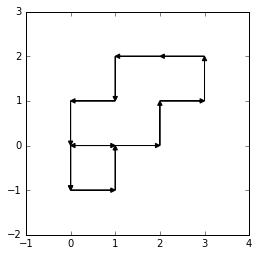

In [56]:
plot_trace(trace_tour(sample_tours[0] + 'FLLLL'))

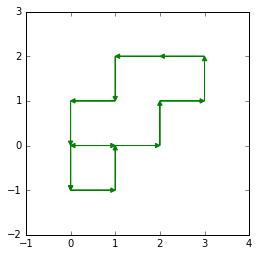

In [57]:
plot_trace(trace_tour(sample_tours[0] + 'FLLLL'), colour='g')

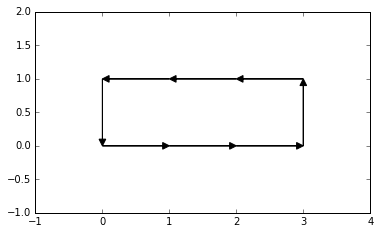

In [58]:
plot_trace(trace_tour('FFFLLFFL'))

In [59]:
trace_tour(walks[3])

[Step(x=0, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=0, dir=<Direction.RIGHT: 2>),
 Step(x=1, y=1, dir=<Direction.UP: 1>),
 Step(x=1, y=2, dir=<Direction.UP: 1>),
 Step(x=1, y=3, dir=<Direction.UP: 1>),
 Step(x=1, y=4, dir=<Direction.UP: 1>),
 Step(x=1, y=5, dir=<Direction.UP: 1>),
 Step(x=0, y=5, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=5, dir=<Direction.LEFT: 4>),
 Step(x=-1, y=6, dir=<Direction.UP: 1>),
 Step(x=-2, y=6, dir=<Direction.LEFT: 4>),
 Step(x=-3, y=6, dir=<Direction.LEFT: 4>),
 Step(x=-4, y=6, dir=<Direction.LEFT: 4>),
 Step(x=-5, y=6, dir=<Direction.LEFT: 4>),
 Step(x=-6, y=6, dir=<Direction.LEFT: 4>),
 Step(x=-6, y=7, dir=<Direction.UP: 1>),
 Step(x=-7, y=7, dir=<Direction.LEFT: 4>),
 Step(x=-7, y=8, dir=<Direction.UP: 1>),
 Step(x=-7, y=9, dir=<Direction.UP: 1>),
 Step(x=-8, y=9, dir=<Direction.LEFT: 4>),
 Step(x=-8, y=8, dir=<Direction.DOWN: 3>),
 Step(x=-8, y=7, dir=<Direction.DOWN: 3>),
 Step(x=-8, y=6, dir=<Direction.DOWN: 3>),
 Step(x=-8, y=5, dir=<Direction.DOW

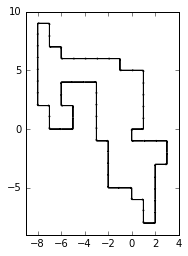

In [60]:
plot_trace(trace_tour(walks[3]))

In [61]:
long_walks = [w for w in walks if len(w) >= 30]
len(long_walks)

10

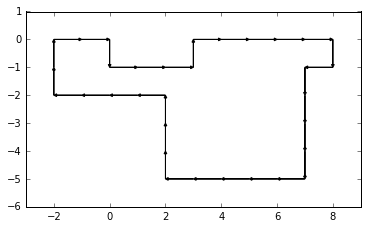

In [62]:
plot_trace(trace_tour(long_walks[0]))

In [63]:
walks

['RLFFLRFFFFRRLFFFRFFFFRFFLFFFRFRF',
 'FFFFFLLFFRRLFFFFLLFFRLRFFLFFLRLL',
 'LRLRLFFFFLLRLRLRFLFFFRLFLFFFLRLL',
 'FLFFFFLFRLFFFFRLRFLLFFFFFFLRFLFLFLRFRFFRFFFFLRFFFLFRLRFLLFFFFRLFLFFR',
 'LLFRLRFFLLRFRFLFFFLRLFFLFRFFFLFFRFFLFFFFLLFFFRFRFFLFRF',
 'FLLFLFFFRLFFLLRFFFFLRFLFFLFFFFLRRF',
 'FFLFRLLFFRFFFLRLFRLFLFFRLFFFLFFFRFRLRLFFLRRFFLLRLRFLFFLFFRFLFLLRRFFFRL',
 'RFFFFFLLRLFFFRLFLRFLLFRFFFFFFFLLFFFFRLLR',
 'LLFFFRLLFFFRFLLFRFFLLRFFLRLFLRRFLL',
 'FLLRFLRFFRRFLFFRRLFFFFFFRFFRFFRL']

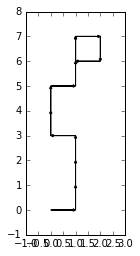

In [64]:
plot_trace(trace_tour('FLFFLRFRLFRRRR'))

In [65]:
w = random_walk()
ms = mistake_positions(trace_tour(w))
len(ms), returns_to_origin(ms)

(313, [])

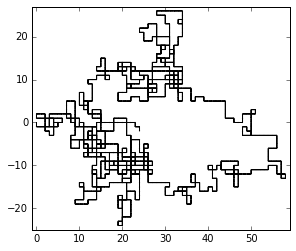

In [66]:
plot_trace(trace_tour(w))

In [67]:
def trim_loop(tour, random_mistake=False):
    trace = trace_tour(tour)
    mistakes = mistake_positions(trace)
    if random_mistake:
        end_mistake_index = random.randrange(len(mistakes))
    else:
        end_mistake_index = 0
#     print('end_mistake_index {} pointing to trace position {}; {} mistakes and {} in trace; {}'.format(end_mistake_index, mistakes[end_mistake_index].i, len(mistakes), len(trace), mistakes))
    # while this mistake extends to the next step in the trace...
    while (mistakes[end_mistake_index].i + 1 < len(trace) and 
           end_mistake_index + 1 < len(mistakes) and
           mistakes[end_mistake_index].i + 1 == 
           mistakes[end_mistake_index + 1].i):
#         print('end_mistake_index {} pointing to trace position {}; {} mistakes and {} in trace'.format(end_mistake_index, mistakes[end_mistake_index].i, len(mistakes), len(trace), mistakes))
        # push this mistake finish point later
        end_mistake_index += 1
    mistake = mistakes[end_mistake_index]
    
    # find the first location that mentions where this mistake ends (which the point where the loop starts)
    mistake_loop_start = max(i for i, loc in enumerate(trace[:mistake.i])
                             if (loc.x, loc.y) == (mistake.step.x, mistake.step.y))
#     print('Dealing with mistake from', mistake_loop_start, 'to', mistake.i, ', trace has len', len(trace))
    
    # direction before entering the loop
    direction_before = trace[mistake_loop_start].dir
    
    # find the new instruction to turn from heading before the loop to heading after the loop
    new_instruction = 'F'
    if (mistake.i + 1) < len(trace):
        if turn_left(direction_before) == trace[mistake.i + 1].dir:
            new_instruction = 'L'
        if turn_right(direction_before) == trace[mistake.i + 1].dir:
            new_instruction = 'R'
#     if (mistake.i + 1) < len(trace):
#         print('turning from', direction_before, 'to', trace[mistake.i + 1].dir, 'with', new_instruction )
#     else:
#         print('turning from', direction_before, 'to BEYOND END', 'with', new_instruction )
    return tour[:mistake_loop_start] + new_instruction + tour[mistake.i+1:]
#     return mistake, mistake_loop_start, trace[mistake_loop_start-2:mistake_loop_start+8]

In [68]:
w = 'RFFRRFFFRFFRFLLRFLFFLLLLFRRRFLFFFFRRFFFRLLLRRFLLFRLLLFRLLRFLRRLFLFFRLLRFLLFRRLLRLFRFFFLLFFLFLRRLFRLRRLRRRRFFFFFFRRRLLFFFFFFLRRRLLLRLLLLRFRLRFRRRFRLRLLRFRLFLLRFRFLRRRRLRFLLRLRRLFFFRLRRFFRFLRFLLFLFRLRLRLRRRLFFRLRRFFRRFFLLRLLFLLLFRFRFLRLFFLFRRRRLRRLRRLRFRRLRRRFRRRRLLRFLLRRFFRLRFFLFLFRRLLLRLFFFRFRLRLLFRRFLLRLFFFLLRLLRRLRFRFFFFFRRFFLFRFLRFRFLFLFRLFLFLRFFLFRLRRRLRRRRFFFRFLLRLFRFRRRLRFFFFFLLFRRLFRRFRFRFLRLLFRFFFLLRRFRRRRLFFFLFLLLFFLRRLRFLFLFFRLLFFRRFFLRLLRFLRLLFLFRLLLRFFFFFFFFLFLRLLRLRLRFLLFFFLFLFFLFRRRRRFFRLLFFFRLFFLFRLFFRFFFFRLRRRLLFLRRFLRFFLRRFRRFLRFLRRLFRRLFFFFRLFLFFLRFFFFFRLFLFLRFFFLLLFLLLFFLRRLFLFRRFRRFFRRRFFRFLFLLFLFRFRFLLLRRRLFRRFFRLRFLFLFLRRLFFFLFRLRFRFFRFLRRFFFFFLFRLRRFRLLRLLFFLLLFFLFFFRLFRFRRRRLFLFLLLLRLFRFRLRLLFLFLLLRRRLLLFRRFRLRFFRRRLLLFRLRLLFFLLRFFFFRLLRLRLLLRLFFFRRLRFRFFRRRFFFRFFFFLRFLFRFLRFRRLLLRLLFRRLFFLRRFFFRLLFRLFLRRFLRLLRRFFLLFLLLFFFFRRFFRLFFLLFLLFRFRLRFLRFFRFRLRLLLFFFLFLRFRFRFLRRLLLLLRFRRLFLLLLRRFFFLLRFLFFRLLLLFLFRLRFFFFFLRLLFFLLLFFLLRRFLRRFLRLRRLLLRRRRRLLLFLRRLFFFRFLRRLF'
w

'RFFRRFFFRFFRFLLRFLFFLLLLFRRRFLFFFFRRFFFRLLLRRFLLFRLLLFRLLRFLRRLFLFFRLLRFLLFRRLLRLFRFFFLLFFLFLRRLFRLRRLRRRRFFFFFFRRRLLFFFFFFLRRRLLLRLLLLRFRLRFRRRFRLRLLRFRLFLLRFRFLRRRRLRFLLRLRRLFFFRLRRFFRFLRFLLFLFRLRLRLRRRLFFRLRRFFRRFFLLRLLFLLLFRFRFLRLFFLFRRRRLRRLRRLRFRRLRRRFRRRRLLRFLLRRFFRLRFFLFLFRRLLLRLFFFRFRLRLLFRRFLLRLFFFLLRLLRRLRFRFFFFFRRFFLFRFLRFRFLFLFRLFLFLRFFLFRLRRRLRRRRFFFRFLLRLFRFRRRLRFFFFFLLFRRLFRRFRFRFLRLLFRFFFLLRRFRRRRLFFFLFLLLFFLRRLRFLFLFFRLLFFRRFFLRLLRFLRLLFLFRLLLRFFFFFFFFLFLRLLRLRLRFLLFFFLFLFFLFRRRRRFFRLLFFFRLFFLFRLFFRFFFFRLRRRLLFLRRFLRFFLRRFRRFLRFLRRLFRRLFFFFRLFLFFLRFFFFFRLFLFLRFFFLLLFLLLFFLRRLFLFRRFRRFFRRRFFRFLFLLFLFRFRFLLLRRRLFRRFFRLRFLFLFLRRLFFFLFRLRFRFFRFLRRFFFFFLFRLRRFRLLRLLFFLLLFFLFFFRLFRFRRRRLFLFLLLLRLFRFRLRLLFLFLLLRRRLLLFRRFRLRFFRRRLLLFRLRLLFFLLRFFFFRLLRLRLLLRLFFFRRLRFRFFRRRFFFRFFFFLRFLFRFLRFRRLLLRLLFRRLFFLRRFFFRLLFRLFLRRFLRLLRRFFLLFLLLFFFFRRFFRLFFLLFLLFRFRLRFLRFFRFRLRLLLFFFLFLRFRFRFLRRLLLLLRFRRLFLLLLRRFFFLLRFLFFRLLLLFLFRLRFFFFFLRLLFFLLLFFLLRRFLRRFLRLRRLLLRRRRRLLLFLRRLFFFRFLRRL

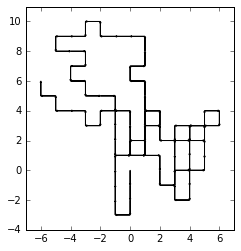

In [69]:
w_short = w[:100]
plot_trace(trace_tour(w_short))

RFFRRFFFRFFRFLLRFLFFLLLLFRRRFLFFFFRRFFFRLLLRRFLLFRLLLFRLLRFLRRLFLFFRLLRFLLFRRLLRLFRFFFLLFFLFLRRLFRLR
RFFRRFFFRFFRFLLRFLFFFRRRFLFFFFRRFFFRLLLRRFLLFRLLLFRLLRFLRRLFLFFRLLRFLLFRRLLRLFRFFFLLFFLFLRRLFRLR


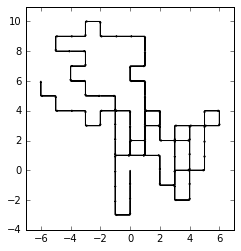

In [70]:
trimmed = trim_loop(w_short)
print('{}\n{}'.format(w_short, trimmed))
plot_trace(trace_tour(trimmed))

RFFRRFFFRFFRFLLRFLFFFRRRFLFFFFRRFFFRLLLRRFLLFRLLLFRLLRFLRRLFLFFRLLRFLLFRRLLRLFRFFFLLFFLFLRRLFRLR
RFFRRFFFRFFRFLLRFLFFLLFFFFRRFFFRLLLRRFLLFRLLLFRLLRFLRRLFLFFRLLRFLLFRRLLRLFRFFFLLFFLFLRRLFRLR


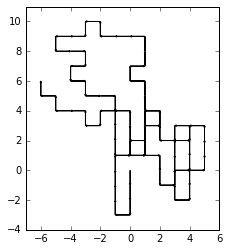

In [71]:
trimmed2 = trim_loop(trimmed)
print('{}\n{}'.format(trimmed, trimmed2))
plot_trace(trace_tour(trimmed2))

In [72]:
mistake_positions(trace_tour(w[:130]))[-10:]

[Mistake(i=104, step=Step(x=-4, y=6, dir=<Direction.DOWN: 3>)),
 Mistake(i=105, step=Step(x=-5, y=6, dir=<Direction.LEFT: 4>)),
 Mistake(i=106, step=Step(x=-5, y=7, dir=<Direction.UP: 1>)),
 Mistake(i=107, step=Step(x=-5, y=8, dir=<Direction.UP: 1>)),
 Mistake(i=108, step=Step(x=-5, y=9, dir=<Direction.UP: 1>)),
 Mistake(i=115, step=Step(x=-5, y=12, dir=<Direction.LEFT: 4>)),
 Mistake(i=116, step=Step(x=-5, y=11, dir=<Direction.DOWN: 3>)),
 Mistake(i=127, step=Step(x=2, y=11, dir=<Direction.LEFT: 4>)),
 Mistake(i=130, step=Step(x=3, y=11, dir=<Direction.UP: 1>)),
 Mistake(i=132, step=Step(x=3, y=11, dir=<Direction.UP: 1>))]

Step(x=40, y=36, dir=<Direction.UP: 1>)


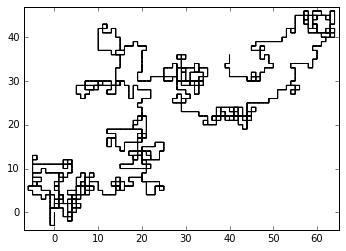

In [73]:
w_tour_start = w #[:250]
print(trace_tour(w_tour_start)[-1])
plot_trace(trace_tour(w_tour_start))

RFFRRFFFRFFRFLLRFLFFLLLLFRRRFLFFFFRRFFFRLLLRRFLLFRLLLFRLLRFLRRLFLFFRLLRFLLFRRLLRLFRFFFLLFFLFLRRLFRLRRLRRRRFFFFFFRRRLLFFFFFFLRRRLLLRLLLLRFRLRFRRRFRLRLLRFRLFLLRFRFLRRRRLRFLLRLRRLFFFRLRRFFRFLRFLLFLFRLRLRLRRRLFFRLRRFFRRFFLLRLLFLLLFRFRFLRLFFLFRRRRLRRLRRLRFRRLRRRFRRRRLLRFLLRRFFRLRFFLFLFRRLLLRLFFFRFRLRLLFRRFLLRLFFFLLRLLRRLRFRFFFFFRRFFLFRFLRFRFLFLFRLFLFLRFFLFRLRRRLRRRRFFFRFLLRLFRFRRRLRFFFFFLLFRRLFRRFRFRFLRLLFRFFFLLRRFRRRRLFFFLFLLLFFLRRLRFLFLFFRLLFFRRFFLRLLRFLRLLFLFRLLLRFFFFFFFFLFLRLLRLRLRFLLFFFLFLFFLFRRRRRFFRLLFFFRLFFLFRLFFRFFFFRLRRRLLFLRRFLRFFLRRFRRFLRFLRRLFRRLFFFFRLFLFFLRFFFFFRLFLFLRFFFLLLFLLLFFLRRLFLFRRFRRFFRRRFFRFLFLLFLFRFRFLLLRRRLFRRFFRLRFLFLFLRRLFFFLFRLRFRFFRFLRRFFFFFLFRLRRFRLLRLLFFLLLFFLFFFRLFRFRRRRLFLFLLLLRLFRFRLRLLFLFLLLRRRLLLFRRFRLRFFRRRLLLFRLRLLFFLLRFFFFRLLRLRLLLRLFFFRRLRFRFFRRRFFFRFFFFLRFLFRFLRFRRLLLRLLFRRLFFLRRFFFRLLFRLFLRRFLRLLRRFFLLFLLLFFFFRRFFRLFFLLFLLFRFRLRFLRFFRFRLRLLLFFFLFLRFRFRFLRRLLLLLRFRRLFLLLLRRFFFLLRFLFFRLLLLFLFRLRFFFFFLRLLFFLLLFFLLRRFLRRFLRLRRLLLRRRRRLLLFLRRLFFFRFLRRLF

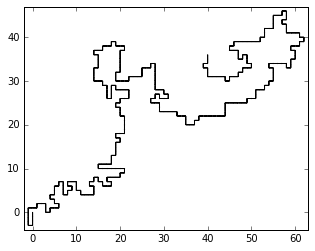

In [74]:
w_tour = w_tour_start
w_trace = trace_tour(w_tour)
mks = mistake_positions(w_trace)
while len(mks) > 1:
#     print(len(mks))
    w_tour = trim_loop(w_tour)
    w_trace = trace_tour(w_tour)
    mks = mistake_positions(w_trace)
print('{}\n{}\n{}'.format(w_tour_start, w_tour, trace_tour(w_tour)[-1]))
plot_trace(trace_tour(w_tour))

In [75]:
def trim_all_loops(tour, mistake_reduction_attempt_limit=10):
    trace = trace_tour(tour)
    mistake_limit = 1
    if trace[-1].x == 0 and trace[-1].y == 0:
        mistake_limit = 0
    mistakes = mistake_positions(trace)
    
    old_mistake_count = len(mistakes)
    mistake_reduction_tries = 0
    
    while len(mistakes) > mistake_limit and mistake_reduction_tries < mistake_reduction_attempt_limit:
        tour = trim_loop(tour)
        trace = trace_tour(tour)
        mistakes = mistake_positions(trace)
        if len(mistakes) < old_mistake_count:
            old_mistake_count = len(mistakes)
            mistake_reduction_tries = 0
        else:
            mistake_reduction_tries += 1
    if mistake_reduction_tries >= mistake_reduction_attempt_limit:
        return ''
    else:
        return tour

In [76]:
w_trimmed = trim_all_loops(w)
w_trimmed

'RFFRRFFFRFLRFRFLLRFLLRLRRLFRLRRFFLLRLLRRFRFLRLFFLFLRRLRRLRLFLLRRFFLRLLFFFFFRRFFLFRLFFRLLRRFLFFFLRFLRRLRFLFLFFRLLFFRRFFLRLFRFFRLFFLRRFLRFLRRLFRRLFFFFRLFLFFLRFFLFRFLRRFFFFFLFRLRRFRLLRLLFRFLFFFRLFRFLFLRLRFFFFFLFFRFFFFLRFLFRFLRLRLFFLRRFFFRLLFRLFLRRFLRLLRLFFRFLRRLFLLRFLFFRFLFRLRFFFFFLRLLFRFLLRRFLRRFLRLRFLRRLFFFRFLRRLF'

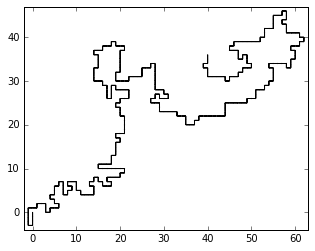

In [77]:
plot_trace(trace_tour(trim_all_loops(w)))

In [78]:
def reverse_tour(tour):
    def swap(tour_step):
        if tour_step == 'R':
            return 'L'
        elif tour_step == 'L':
            return 'R'
        else:
            return tour_step
        
    return ''.join(swap(s) for s in reversed(tour))

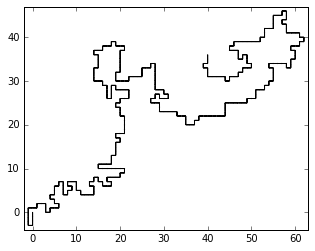

In [79]:
plot_trace(trace_tour(w_trimmed))

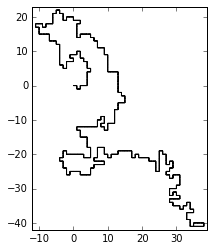

In [80]:
plot_trace(trace_tour(reverse_tour(w_trimmed)))

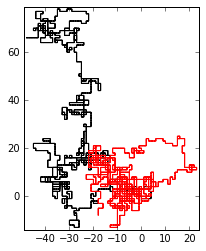

In [81]:
w1 = random_walk()
w2 = random_walk()
plot_trace(trace_tour(w1))
w1bounds = bounds(trace_tour(w1))
plot_trace(trace_tour(w2), colour='r', xybounds=w1bounds)

In [82]:
print("w1 = '{}".format(w1))
print("w2 = '{}".format(w2))

w1 = 'RLFFFLFFLRFLFLRFFFFFFLLFFFLFLFLFFLLLFFFFFRFFLRFLFFLFFFFLLFLLRFFFFLRLFRRLLFLRFLFLLFFLFFRFFFFLRFLLRFFLRFFRFRLFRFRFFLFLRFRLLFRLFFLLLFFFRFLFFLFLLRFRFLFRRFRFLLFRFFFFLFFFRLFFFFRFRFRFLFFRFFFLFRFFRRLRFRFFLFFFRRFLFFRRRFLFFLRFFLLFFLFRFFRFRRFFRRLLLFFFFFFFRFLFLFLLFRFFFLFFFRRFFLFFRRFFLRFRLRFFFRFRLFRLFRRFLLLFLRFLFRFFRLFLFRFFFFLFRLFFRRFFRFRFFFFFFLFLRLFFFFRLRFFRLFFLFFFLRFFFFLRFFRFFRFRFFRFFRRRFFRFLRLLLFLFFFLFRFFRLFRLLFLFLFLLRFLFLFLFLFFRFFRRLLFRRLRLFFFFLRLRRRFFRFFRRFFRLLFFLLLLFLLLLFFRLFFRRRRFFRRRRLFFLFFFRLLRLFRLRFLFRFRRFLLLFFFFFLFFRRRFRLRLFRLLLRFLFFFFFFFFRRFFFFRLRRFFRLFFRLFFLLLFFLFFFFFLFFLFRRRFLFLFFFFLFLFLLLRFRFLFRLFLFFLRFLLFLRLLLFLFRRLFFRLFLRLFFRFLFLFFFRFRFRFFRFFRRFFRFRFFFFFRRFFLFFRFLRFFFLFFFFRFRLFRFFRRFFFFLFFFFLRFRFFLLLRLRRLLFFLRLLFFFRFFFFFFLFRFFFLRFRLRFFLLFFRLRFFFFRRFRFFLRFRFRFLFFFRFFFFRLFLRLFFLRLFFFFFRLFLRFFRLLFFRLFRFFFLRLRFLFLFFFLFFFFLFLRRFFRLLFFLFFLFRLFFFRLFRFRFFLFFLFLLFRLLFFRFLFLFFFFLFLRFRFRLFRRFLLRRRRFFRFLFRFFLLFRRRFRLRRLRFFLRLFLLFLLFFFRLLFLRFRLFLRFLRFFRLLRLRRFFFLLFFLLFLFRFLLLRFRRLFLLLRRFF

In [83]:
def wander_near(locus, current, limit=10):
    valid_proposal = False
    while not valid_proposal:
        s = random.choice('FFFRL')
        if s == 'F':
            proposed = advance(current, current.dir)
        elif s == 'L':
            proposed = advance(current, turn_left(current.dir))
        elif s == 'R':
            proposed = advance(current, turn_right(current.dir))
        if abs(proposed.x - locus.x) < limit and abs(proposed.y - locus.y) < limit:
            valid_proposal = True
#     print('At {} going to {} by step {} to {}'.format(current, locus, s, proposed))
    return s, proposed

In [84]:
def seek(goal, current):
    dx = current.x - goal.x
    dy = current.y - goal.y

    if dx < 0 and abs(dx) > abs(dy): # to the left
        side = 'left'
        if current.dir == Direction.RIGHT:
            s = 'F'
        elif current.dir == Direction.UP:
            s = 'R'
        else:
            s = 'L'
    elif dx > 0 and abs(dx) > abs(dy): # to the right
        side = 'right'
        if current.dir == Direction.LEFT:
            s = 'F'
        elif current.dir == Direction.UP:
            s = 'L'
        else:
            s = 'R'
    elif dy > 0 and abs(dx) <= abs(dy): # above
        side = 'above'
        if current.dir == Direction.DOWN:
            s = 'F'
        elif current.dir == Direction.RIGHT:
            s = 'R'
        else:
            s = 'L'
    else: # below
        side = 'below'
        if current.dir == Direction.UP:
            s = 'F'
        elif current.dir == Direction.LEFT:
            s = 'R'
        else:
            s = 'L'
    if s == 'F':
        proposed = advance(current, current.dir)
    elif s == 'L':
        proposed = advance(current, turn_left(current.dir))
    elif s == 'R':
        proposed = advance(current, turn_right(current.dir))
        
#     print('At {} going to {}, currently {},  by step {} to {}'.format(current, goal, side, s, proposed))

    return s, proposed

In [85]:
def guided_walk(loci, locus_limit=5, wander_limit=10, seek_step_limit=20, return_anyway=False):
    trail = ''
    current = Step(0, 0, Direction.RIGHT)    
    l = 0
    finished = False
    while not finished:
        if abs(current.x - loci[l].x) < locus_limit and abs(current.y - loci[l].y) < locus_limit:
            l += 1
            if l == len(loci) - 1:
                finished = True
        s, proposed = wander_near(loci[l], current, limit=wander_limit)
        trail += s
        current = proposed
#     print('!! Finished loci')
    seek_steps = 0
    while not (current.x == loci[l].x and current.y == loci[l].y) and seek_steps < seek_step_limit:
#         error = max(abs(current.x - loci[l].x), abs(current.y - loci[l].y))
#         s, proposed = wander_near(loci[l], current, limit=error+1)
        s, proposed = seek(loci[l], current)
        trail += s
        current = proposed
        seek_steps += 1
    if seek_steps >= seek_step_limit and not return_anyway:
        return ''
    else:
        return trail

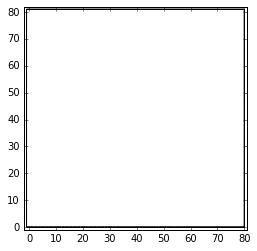

In [86]:
def square_tour(a=80):
    "a is width of square"
    return ('F' * a + 'L') * 4

plot_trace(trace_tour(square_tour()))

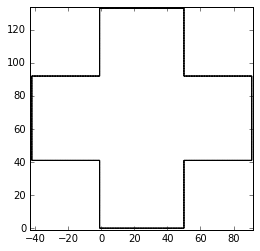

In [87]:
def cross_tour(a=50, b=40):
    "a is width of cross arm, b is length of cross arm"
    return ('F' *  a + 'L' + 'F' * b + 'R' + 'F' * b + 'L') * 4

plot_trace(trace_tour(cross_tour()))

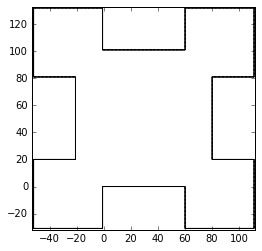

In [88]:
def quincunx_tour(a=60, b=30, c=50):
    "a is length of indent, b is indent/outdent distance, c is outdent outer length"
    return ('F' * a + 'R' + 'F' * b + 'L' + 'F' * c + 'L' + 'F' * c + 'L' + 'F' * b + 'R') * 4
plot_trace(trace_tour(quincunx_tour()))

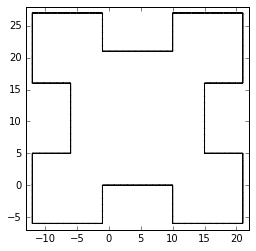

In [89]:
plot_trace(trace_tour(('F' * 10 + 'R' + 'F' * 5 + 'L' + 'F' * 10 + 'L' + 'F' * 10 + 'L' + 'F' * 5 + 'R') * 4))

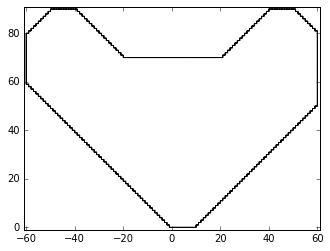

In [90]:
heart_points = [Step(60, 50, Direction.UP), Step(50, 90, Direction.UP),
                Step(20, 70, Direction.UP), 
                Step(-40, 90, Direction.UP), Step(-60, 80, Direction.UP), 
                Step(0, 0, Direction.RIGHT)]

heart_tour = ''
current = Step(0, 0, Direction.RIGHT)

for hp in heart_points:
    while not (current.x == hp.x and current.y == hp.y):
        s, proposed = seek(hp, current)
        heart_tour += s
        current = proposed

plot_trace(trace_tour(heart_tour))

def heart_tour_func(): return heart_tour

In [91]:
# lc = trace_tour(('F' * 50 + 'L') * 4)
# lc = trace_tour(('F' * 50 + 'L' + 'F' * 20 + 'R' + 'F' * 20 + 'L') * 4)
# lc = trace_tour(('F' * 60 + 'R' + 'F' * 30 + 'L' + 'F' * 60 + 'L' + 'F' * 60 + 'L' + 'F' * 30 + 'R') * 4)
lc = trace_tour(heart_tour)
rw = guided_walk(lc, wander_limit=8)
rw

'LRLRFRFFLFRFLFLFFFFFFRFFFFLFRRFFRLFLLRFFFLFFFRFFFLLFFRRLFFFRRFFLFRRFRFLFRRLRFRLRLRRFFFFRRRLFLFFLLLFLRFFFFFFFFRRFLRFFFRFFLRFFFRFRLRFRFFFRFFFFFFFRRFRLFFFLLRFFRFLFFLFFLLFLFFFFFFLFLFLFRFRRLFFFRFFLRFFLFRFFLRFRFRFFFFRFRRRFFLLFFLFLLFLFFFFFLLFLLLRFLFFFFFFLLRLLFLLFLRFFFLFFFRFFFFRFFFFFFFFFFFFRFRFLFFLFFLFLFLFRFRFLFFFFFLFRLFLFLFFLLRRRLLLFFFFFFFFLFFLFFRRFFRFLLFFRFFFFLFFLFLFFFLLLFFFFFRFFRFLFFLRFFRFFFRFFLRLFFLFFRRFRFFRFFFLFRFRFFRFLFFFFRLFFFFLFFFLLFLFRRRFFFRLLFFLLFLFFLFRLFLRLRFFFFFRFFFRLFFRRFRFRRFRFFFRFLFLFLFFFRFFRLFFRRFFFFFFRLLLLFFLRRRFLFFFLRRFLLLFFFFFFLLFLFFRRRFFRRRFLFFLFRFLFFFLFFFFLFLFFLRFFFFRRFFRFRFFLLFRFLRFRFLFFRRFLFFFFLFFFLFFLFRLLFFLLLLLFRLLFFLFLLRRLLLLRRFFFLLFFRFFFFFFFFRRFFFLRFLLFRRFLFFFFFFFFFFLRFFFLFRFFLFLLLFFRFLFFLRLFFFLFLLFLFLFFRFRRFLLFFLFLFRRFFFFFFLRFLLFFLFLRFFRRFFFFFFFFFRRRRFFRRFRRFFFRFFFFFFFRLFFFRRFFLFFLLRRFRFFFRLLFFFLLRFFFLFRLFFRFRFRRFFFFFFFFFFRFRFFFRFRRRFRLFFLLFLLFLFFFFLFFRLFRLRFFRFLFFFFFFLFFFFFFFLFFFLFFLLFRFLLFRFLLLLLRFFFFFRFFFRFRFFFLLLLLFFFFLLFFFFRFFRLFFFRRRFFFLLFLFLRFFFFLLFLFRLFLFFF

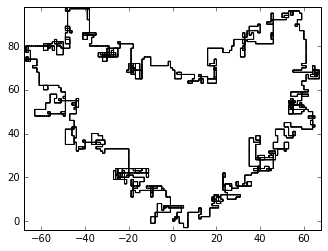

In [92]:
plot_trace(trace_tour(rw))

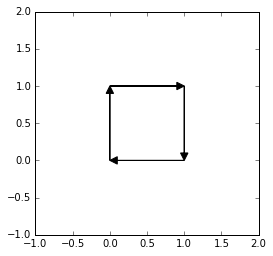

In [93]:
rw_trimmed = trim_all_loops(rw)
plot_trace(trace_tour(rw_trimmed))

In [94]:
len(rw_trimmed)

4

(250,
 92,
 'LFLRRFFFFRFRFRLLFFFFLFFFFLFLRFFRFRLLFRFLRFFLFFFLFRLRFFLFLFRLFRFFFFRFLFFFFFLFFFLRRLFFFFLLRFRL')

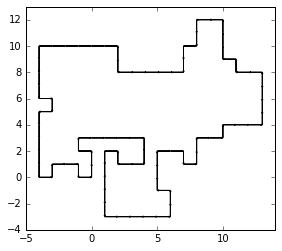

In [95]:
lc = trace_tour(square_tour(a=10))
rw = guided_walk(lc, wander_limit=4, locus_limit=2)
rw_trimmed = trim_all_loops(rw)
plot_trace(trace_tour(rw_trimmed))
len(rw), len(rw_trimmed), rw_trimmed

In [96]:
# success_count = 0
# while success_count <= 20:
#     lc = trace_tour(square_tour(a=10))
#     rw = guided_walk(lc, wander_limit=4, locus_limit=2)
#     if rw:
#         rw_trimmed = trim_all_loops(rw)
#         if len(rw_trimmed) > 10:
#             with open('small-squares.txt', 'a') as f:
#                 f.write(rw_trimmed + '\n')
#                 success_count += 1

In [97]:
# success_count = 0
# while success_count <= 20:
#     lc = trace_tour(square_tour())
#     rw = guided_walk(lc)
#     if rw:
#         rw_trimmed = trim_all_loops(rw)
#         if len(rw_trimmed) > 10:
#             with open('large-squares.txt', 'a') as f:
#                 f.write(rw_trimmed + '\n')
#                 success_count += 1

In [98]:
# success_count = 0
# while success_count <= 20:
#     lc = trace_tour(cross_tour())
#     rw = guided_walk(lc)
#     if rw:
#         rw_trimmed = trim_all_loops(rw)
#         if len(rw_trimmed) > 10:
#             with open('cross.txt', 'a') as f:
#                 f.write(rw_trimmed + '\n')
#                 success_count += 1

In [99]:
# success_count = 0
# while success_count <= 20:
#     lc = trace_tour(quincunx_tour())
#     rw = guided_walk(lc)
#     if rw:
#         rw_trimmed = trim_all_loops(rw)
#         if len(rw_trimmed) > 10:
#             with open('quincunx.txt', 'a') as f:
#                 f.write(rw_trimmed + '\n')
#                 success_count += 1

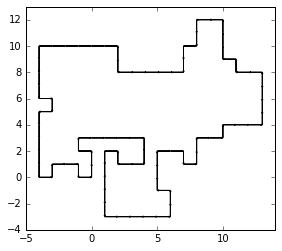

In [100]:
plot_trace(trace_tour(rw_trimmed), filename='test.png')

In [101]:
# patterns = [square_tour, cross_tour, quincunx_tour, heart_tour_func]
# tours_filename = 'tours.txt'

# try:
#     os.remove(tours_filename)
# except OSError:
#     pass

# success_count = 0
# while success_count < 100:
#     lc = trace_tour(random.choice(patterns)())
#     rw = guided_walk(lc)
#     if rw:
#         rw_trimmed = trim_all_loops(rw)
#         if len(rw_trimmed) > 10:
#             with open(tours_filename, 'a') as f:
#                 f.write(rw_trimmed + '\n')
#                 success_count += 1

Found mistakes: 1867


(5242,
 1244,
 'LLFFFFFLLRLRFFFFFFFRFFFFFFRRFFFLFFFFLRFRLFFLFFLFRRLFFFFRFLFFFRLFRLFFLFFFFRLFLLRRFFFRFRFLFRFFLRFRFLFLFRFFFFLLFFFFFFFRFFFFFFFFFRFFFRLFFFLFFFFLFFLRFFRFLFRFFFFFFFFFLLFFFRFFLRFFRLFFFLRFLFFFFFFLFRFRFFFFFFFFFRFFLRFFRLFLFFFFRFRLLFRFFRFLFFLFFFRLFFFFFLRFRFFFFFLRFFFLLFFFFRRLRFFFFLRRFFFFLFRFFLFFFFLFFFFLFFRRFFLFFFRFRLLRLRFRFLFRFLFFFFFFFLFRLLRRFFFFFFLFLRFLFFRFFFRLRRLLFFFRLFLRFLFRLFFFFFFRFFRFFFFLFFRLRFLLRFFFFFFLFRLFRFLFFRFFFRFLFLFRRLLRFRFLFFFFFLFLRLRRFLRFFFFLLFRFRLFLRRFFLFFFFLFRFRLFRLFLFFFFRFFRFLLRFFLLRFFRFRFLFLFRFLRFRLLFFFFRFFFRFFFFLRLFRRFFLFFLFRLFFFFRRFFFLFRFFFFFFFLLFFFRFFFRFFFLFRFLFFFLFFRFFFLLRRFFFLRFFLFFFRFFFFLFFFRFLRFLFRLFFFRFFFLLFFFFFRLFFFFRFFFRFFFFFFFFLLRFFRLRLFFFFFFFFFFFFFFRFFFFFLLFRFLFRFFFFFFLFLFRRFFFFFFRFLFFFFLFFFLFFLRRFFFFFFFLFFRFRFFFFFFFLFFFFFFFFFLFFFFFFFFFFRLFFLRFFFRFFFFRFLFFFFFFRLFFRLFLRFFRFLFRFFRFLFFFLLRFFFRLLRFRFFLFFRFFFFRFFFLFRFLFFFFRFFFFRRLFFLFFLFLRRLFFFRFLLFFFFRRFLFFFLFFFRFFLFRFFFRFFLFFFFFFFFRFLFFRFLFFFFLFFFLFFRFLRLFFFFRRLFFLLRLRRFFFFFFFFFRFLFFFFFFFFLFFFFRFFRFRLFFLL

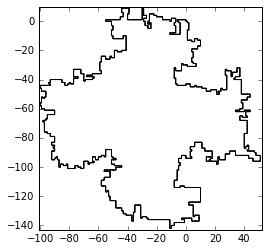

In [102]:
lc = trace_tour(cross_tour())
rw = guided_walk(lc)
print('Found mistakes:', len(mistake_positions(trace_tour(rw))))
rw_trimmed = trim_all_loops(rw)
plot_trace(trace_tour(rw_trimmed))
len(rw), len(rw_trimmed), rw_trimmed

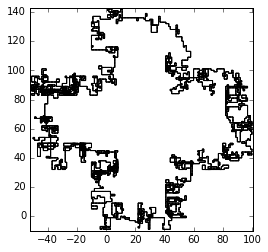

In [103]:
plot_trace(trace_tour(rw))

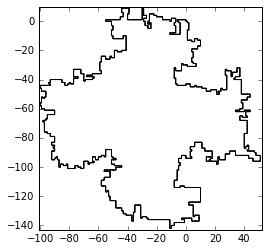

In [104]:
plot_trace(trace_tour(trim_all_loops(rw)))

In [105]:
w_tour = rw
w_trace = trace_tour(w_tour)
mks = mistake_positions(w_trace)
print(mks[:3])
trim_loop(w_tour)

[Mistake(i=8, step=Step(x=0, y=0, dir=<Direction.RIGHT: 2>)), Mistake(i=30, step=Step(x=0, y=-8, dir=<Direction.LEFT: 4>)), Mistake(i=31, step=Step(x=-1, y=-8, dir=<Direction.LEFT: 4>))]


'RFFRLFFLRFRFLLFFFFLLFFFFFLRRFRFFFFFFLFFFFFLFFRLLFFFLRRRFFFFRRLFFFFFLFFRFRFFRFRLRLRFFFFFFFRFFRFRRFRFFFFRFFFFLLLFRRRFFFRFFFRFFFFRFFFLLFFFLFFFFLRFRLFFLFFLFRRLFFFFRRFFRFLLLFFFRFLFFFRLFLFRFFFLLRLRLFRFFFRRFFLFFLLRLLFFFFFFRLFFFRLLLFFFRLLFRFFFFRFRFFRFLFFFLFFLFFFFRLFLLRRFFFFFFRLLFFLFFFLFFFRFLFRFFLLRFRRFLFRLLFLFFLLFRFLFLFRFFFFLLFFFFFFFFRLLLFLFLFFRFLFFFLFFFLLRFFFFFLFFFFFFFFRFFFRLLLLLFFFLFFFFLFFLRFFRFLFFFFRRRFRLLRRFLRRLFFFFRFFFFFFFRRFFFFFLLLRFFRFFFFRFFFFLRRFFFFFFFLLFFFLFRRLLFFRFRFFFRRFFFRFFFRRFRFFFFFFFFLLFLRRLLRFFFRLFRFFLLFLLFFFLRRRFFFFFFFLFLLFLLRLLLLLFFFFFFFLFLLLRLFFLLFFFRFFLRFFRLFFFFRLLFRLFLLRLFFFFFLFFLLFFRFLRFRFLFLFRFFFFFRFRRRRFRFFFFFFRRFLFLLFLFFFFLFRFRFFFFFFFFFFFRFFLLRFLFLFLFFFFRFFLFFFRFFFRFFFRFLFFFLLLRFLRRFFLFLRRRFFFFFFFRFFFFRFFFFFFRLFFFLRLLFLRRLFFFFFLFFFRFFRFRFFLRFFRFFRFRRLRFFLFFFFFFLLFLFFRLFRLLFRRRFFRFRFFRFLFFLFFFFRRRRFFFFFFRLFLRRRFRFFFFLFFFLLRFFRFFFFLLFFFFFFFFLFFFFFFFFFFFFFFRFFRFFRFFFLLFFFFLFFRRFRFLFFFRFRLFRLFFRRFFFLLFLFLRFFFLRLLFLFFFFLRRFFRFFRFLLRRFFFFFFFFRRLFRRFRFFFFFLRFFFLLFFFFRRLFFFLL

1867
1863
1860
1859
1850
1843
1837
1833
1831
1829
1821
1816
1814
1799
1793
1788
1784
1778
1777
1772
1764
1760
1758
1755
1752
1748
1736
1731
1726
1717
1705
1700
1695
1692
1686
1681
1677
1674
1669
1661
1658
1657
1653
1646
1644
1642
1636
1625
1623
1609
1602
1597
1596
1595
1590
1586
1582
1571
1569
1565
1564
1563
1561
1557
1550
1548
1547
1541
1536
1534
1532
1529
1527
1521
1517
1516
1513
1512
1510
1506
1493
1489
1482
1480
1479
1473
1471
1469
1460
1457
1453
1451
1444
1442
1440
1438
1432
1427
1417
1413
1405
1401
1393
1389
1377
1372
1362
1343
1341
1337
1331
1329
1325
1317
1313
1286
1285
1281
1273
1265
1255
1247
1243
1236
1234
1230
1222
1216
1215
1214
1213
1209
1206
1199
1198
1196
1192
1191
1189
1184
1180
1176
1170
1163
1161
1154
1148
1146
1145
1139
1136
1133
1129
1126
1120
1113
1111
1105
1098
1095
1085
1076
1070
1067
1065
1062
1058
1056
1047
1044
1042
1041
1037
1031
1027
1019
1011
1009
1008
1004
1000
990
986
984
982
980
974
966
960
959
957
956
954
952
950
947
946
941
936
933
930
928
922
910
903

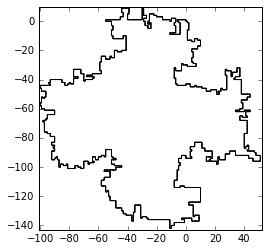

In [106]:
w_tour = rw
w_trace = trace_tour(w_tour)
mks = mistake_positions(w_trace)
while len(mks) > 3:
    print(len(mks))
    w_tour = trim_loop(w_tour)
    w_trace = trace_tour(w_tour)
    mks = mistake_positions(w_trace)
print('{}\n{}\n{}'.format(w_tour_start, w_tour, trace_tour(w_tour)[-1]))
plot_trace(trace_tour(w_tour))

In [107]:
mks

[]

In [108]:
trim_loop(w_tour)

IndexError: list index out of range

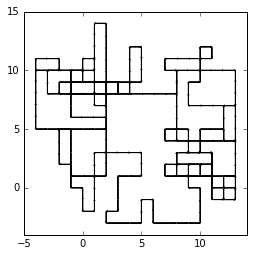

In [109]:
lc = trace_tour(square_tour(a=10))
rw = guided_walk(lc, wander_limit=4, locus_limit=2)
plot_trace(trace_tour(rw))

(292,
 10,
 'RFLLFFLFLL',
 [Step(x=-1, y=0, dir=<Direction.DOWN: 3>),
  Step(x=0, y=0, dir=<Direction.RIGHT: 2>)])

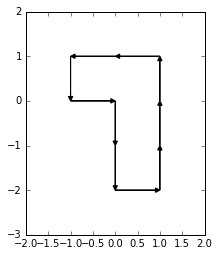

In [110]:
rw_trimmed = trim_all_loops(rw)
plot_trace(trace_tour(rw_trimmed))
len(rw), len(rw_trimmed), rw_trimmed, trace_tour(rw_trimmed)[-2:]

(1, Step(x=0, y=0, dir=<Direction.RIGHT: 2>))

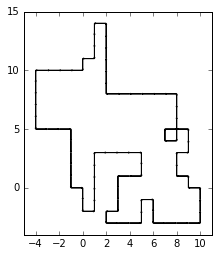

In [111]:
rw_trimmed = rw
mks = len(mistake_positions(trace_tour(rw_trimmed)))
while mks >= 4:
    rw_trimmed = trim_loop(rw_trimmed, random_mistake=True)
    mks = len(mistake_positions(trace_tour(rw_trimmed)))
    
# rw_trimmed = trim_all_loops(rw)
plot_trace(trace_tour(rw_trimmed))
mks, trace_tour(rw_trimmed)[-1]

In [112]:
def trim_some_mistakes(tour, mistake_limit):
    trimmed_tour = rw
    mistake_count = len(mistake_positions(trace_tour(trimmed_tour)))
    while len(mistake_positions(trace_tour(trimmed_tour))) > mistake_limit:
        trimmed_tour = trim_loop(trimmed_tour, random_mistake=True)
    return trimmed_tour

(3, Step(x=0, y=0, dir=<Direction.RIGHT: 2>))

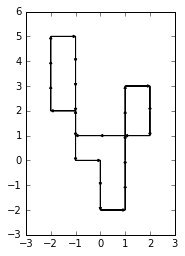

In [113]:
rw_trimmed = trim_some_mistakes(rw, 4)

plot_trace(trace_tour(rw_trimmed))
len(mistake_positions(trace_tour(rw_trimmed))), trace_tour(rw_trimmed)[-1]

In [114]:
# patterns = [square_tour, cross_tour, quincunx_tour, heart_tour_func]
# tours_filename = 'tours-with-mistakes.txt'

# try:
#     os.remove(tours_filename)
# except OSError:
#     pass

# success_count = 0
# while success_count < 100:
#     lc = trace_tour(random.choice(patterns)())
#     rw = guided_walk(lc)
#     if rw:
#         rw_trimmed = trim_some_mistakes(rw, random.randint(0, 15) + random.randint(1, 3))
#         if len(rw_trimmed) > 10:
#             with open(tours_filename, 'a') as f:
#                 f.write(rw_trimmed + '\n')
#                 success_count += 1

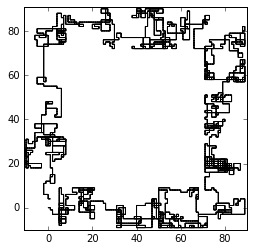

In [115]:
lc = trace_tour(square_tour())
rw = guided_walk(lc, seek_step_limit=0, return_anyway=True)
plot_trace(trace_tour(rw))

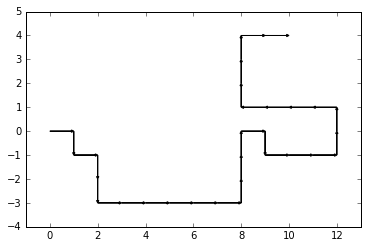

In [116]:
rw_trimmed = trim_some_mistakes(rw, 1)
plot_trace(trace_tour(rw_trimmed))

In [117]:
mistake_positions(trace_tour(rw_trimmed))

[Mistake(i=32, step=Step(x=10, y=4, dir=<Direction.RIGHT: 2>))]

In [ ]:
# patterns = [square_tour, cross_tour, quincunx_tour, heart_tour_func]
# tours_filename = 'tours-open.txt'

# try:
#     os.remove(tours_filename)
# except OSError:
#     pass

# success_count = 0
# while success_count < 100:
#     lc = trace_tour(random.choice(patterns)())
#     rw = guided_walk(lc, seek_step_limit=0, return_anyway=True)
#     if rw:
#         rw_trimmed = trim_some_mistakes(rw, random.randint(0, 15) + random.randint(1, 3))
#         if len(rw_trimmed) > 10:
#             with open(tours_filename, 'a') as f:
#                 f.write(rw_trimmed + '\n')
#                 success_count += 1

In [119]:
tours_filename = 'tours-random-walk.txt'

try:
    os.remove(tours_filename)
except OSError:
    pass

success_count = 0
while success_count < 200:
    rw = random_walk()
    if rw:
        if random.choice([True, False]):
            rw_trimmed = trim_some_mistakes(rw, random.randint(0, 15) + random.randint(1, 3))
        else:
            rw_trimmed = trim_all_loops(rw)
        if len(rw_trimmed) > 10:
            with open(tours_filename, 'a') as f:
                f.write(rw_trimmed + '\n')
                success_count += 1